In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# URL directe vers le fichier de données sur le dépôt UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx"

print("Chargement des données en ligne depuis l'URL...")

try:
    # Utiliser pandas pour lire le fichier Excel directement depuis l'URL
    df = pd.read_excel(url)
    
    # Renommer les colonnes
    df.columns = [
        'Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
        'Overall_Height', 'Orientation', 'Glazing_Area',
        'Glazing_Area_Distribution', 'Heating_Load', 'Cooling_Load'
    ]
    
    print("✅ Chargement des données terminé avec succès !")
    print("\nAperçu des données chargées :")
    print(df.head())

except Exception as e:
    print(f"❌ Erreur lors du chargement des données : {e}")
    print("Veuillez vérifier votre connexion internet ou l'URL du fichier.")
    df = pd.DataFrame() # Créer un DataFrame vide en cas d'erreur

Chargement des données en ligne depuis l'URL...
✅ Chargement des données terminé avec succès !

Aperçu des données chargées :
   Relative_Compactness  Surface_Area  Wall_Area  Roof_Area  Overall_Height  \
0                  0.98         514.5      294.0     110.25             7.0   
1                  0.98         514.5      294.0     110.25             7.0   
2                  0.98         514.5      294.0     110.25             7.0   
3                  0.98         514.5      294.0     110.25             7.0   
4                  0.90         563.5      318.5     122.50             7.0   

   Orientation  Glazing_Area  Glazing_Area_Distribution  Heating_Load  \
0            2           0.0                          0         15.55   
1            3           0.0                          0         15.55   
2            4           0.0                          0         15.55   
3            5           0.0                          0         15.55   
4            2           0.0      

In [3]:
if not df.empty:
    # 1. Définir les caractéristiques (X) : toutes les colonnes sauf les cibles
    # Ce sont nos variables prédictives
    features = ['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
                'Overall_Height', 'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution']
    X = df[features]

    # 2. Définir la cible (y) : la colonne que nous voulons prédire
    # Pour cet exemple, nous prédisons 'Heating_Load'
    y = df['Heating_Load']

    print("\nCaractéristiques (X) sélectionnées :")
    print(X.head())
    print("\nCible (y) sélectionnée (Heating_Load) :")
    print(y.head())


Caractéristiques (X) sélectionnées :
   Relative_Compactness  Surface_Area  Wall_Area  Roof_Area  Overall_Height  \
0                  0.98         514.5      294.0     110.25             7.0   
1                  0.98         514.5      294.0     110.25             7.0   
2                  0.98         514.5      294.0     110.25             7.0   
3                  0.98         514.5      294.0     110.25             7.0   
4                  0.90         563.5      318.5     122.50             7.0   

   Orientation  Glazing_Area  Glazing_Area_Distribution  
0            2           0.0                          0  
1            3           0.0                          0  
2            4           0.0                          0  
3            5           0.0                          0  
4            2           0.0                          0  

Cible (y) sélectionnée (Heating_Load) :
0    15.55
1    15.55
2    15.55
3    15.55
4    20.84
Name: Heating_Load, dtype: float64


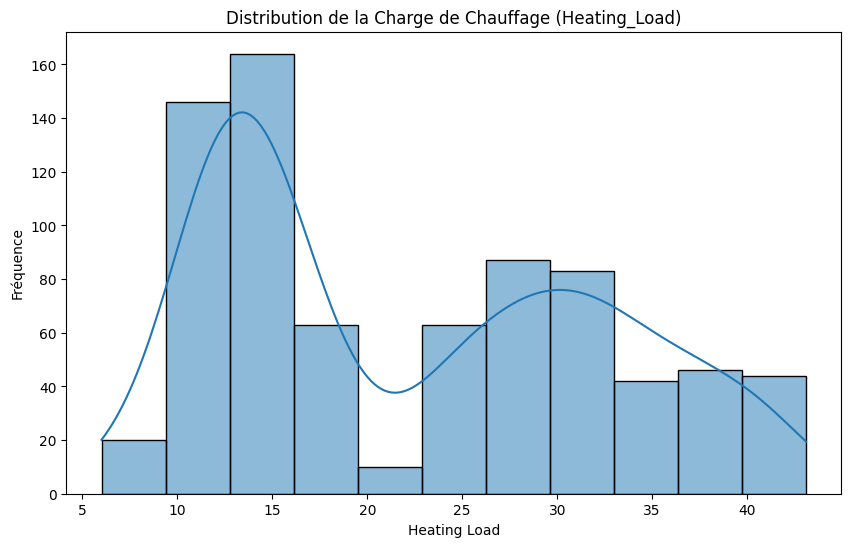

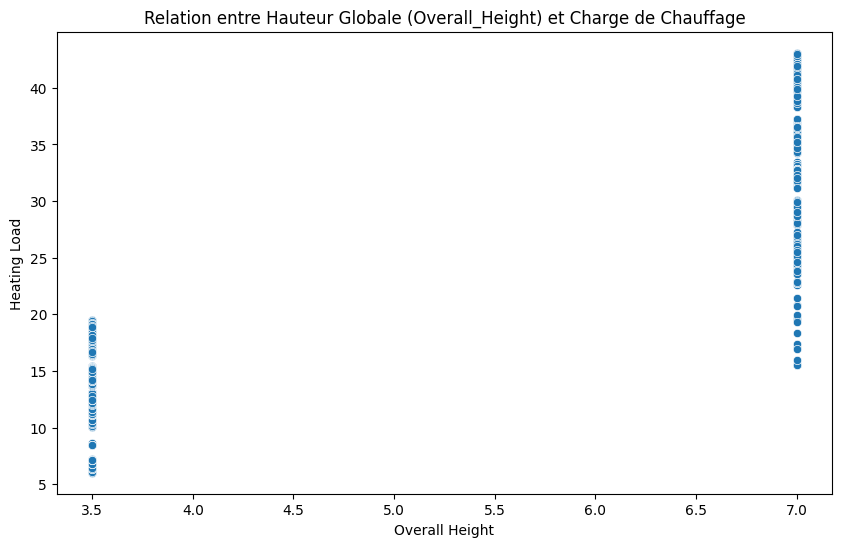

In [4]:
if not df.empty:
    # Visualiser la distribution de notre cible 'Heating_Load'
    plt.figure(figsize=(10, 6))
    sns.histplot(y, kde=True)
    plt.title('Distribution de la Charge de Chauffage (Heating_Load)')
    plt.xlabel('Heating Load')
    plt.ylabel('Fréquence')
    plt.show()

    # Visualiser la relation entre une caractéristique et la cible
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df['Overall_Height'], y=df['Heating_Load'])
    plt.title('Relation entre Hauteur Globale (Overall_Height) et Charge de Chauffage')
    plt.xlabel('Overall Height')
    plt.ylabel('Heating Load')
    plt.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

if 'X' in locals() and 'y' in locals():
    # Diviser les données : 80% pour l'entraînement, 20% pour le test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Normaliser les caractéristiques pour que les modèles convergent mieux
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    print("Forme de X_train_scaled:", X_train_scaled.shape)
    print("Forme de X_test_scaled:", X_test_scaled.shape)

Forme de X_train_scaled: (614, 8)
Forme de X_test_scaled: (154, 8)


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# Dictionnaire pour stocker les modèles entraînés
models = {}

print("Entraînement des modèles de régression...")

# 1. Régression Linéaire
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
models['Linear Regression'] = lr_model

# 2. Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
models['Random Forest'] = rf_model

# 3. Support Vector Regressor (SVR)
svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)
models['SVR'] = svr_model

# 4. Gradient Boosting Regressor (similaire à XGBoost)
gbr_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr_model.fit(X_train_scaled, y_train)
models['Gradient Boosting'] = gbr_model

print("✅ Entraînement des 4 modèles terminé.")

Entraînement des modèles de régression...
✅ Entraînement des 4 modèles terminé.


In [8]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

results = []

for name, model in models.items():
    # Faire des prédictions sur l'ensemble de test
    y_pred = model.predict(X_test_scaled)
    
    # Calculer les métriques
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    results.append([name, r2, mae, mse])

# Créer un DataFrame pandas pour afficher les résultats de manière claire
results_df = pd.DataFrame(results, columns=['Modèle', 'R² Score', 'MAE', 'MSE'])

print("\n--- Tableau Comparatif des Performances des Modèles ---")
print(results_df.round(3))


--- Tableau Comparatif des Performances des Modèles ---
              Modèle  R² Score    MAE    MSE
0  Linear Regression     0.912  2.182  9.153
1      Random Forest     0.998  0.358  0.247
2                SVR     0.924  1.889  7.970
3  Gradient Boosting     0.997  0.386  0.265


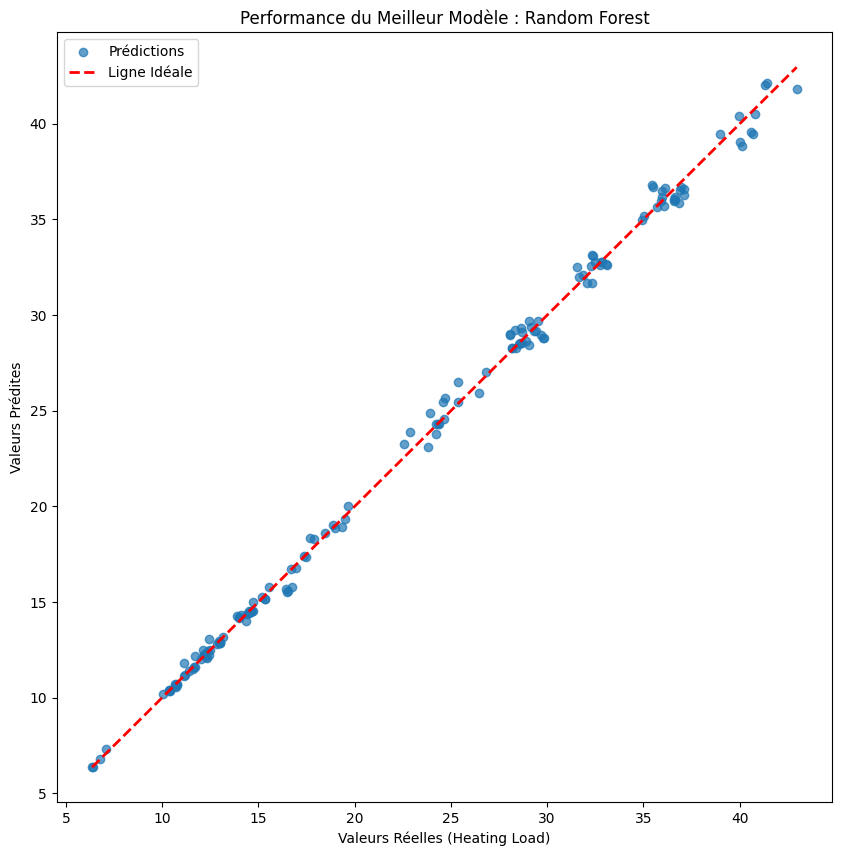

In [9]:
# Identifier le meilleur modèle (basé sur le score R²)
best_model_name = results_df.sort_values(by='R² Score', ascending=False).iloc[0]['Modèle']
best_model = models[best_model_name]

# Faire des prédictions avec le meilleur modèle
y_pred_best = best_model.predict(X_test_scaled)

# Créer un graphique pour comparer les valeurs réelles et prédites
plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_pred_best, alpha=0.7, label='Prédictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2, label='Ligne Idéale')
plt.xlabel('Valeurs Réelles (Heating Load)')
plt.ylabel('Valeurs Prédites')
plt.title(f'Performance du Meilleur Modèle : {best_model_name}')
plt.legend()
plt.show()